In [1]:
# Necessary Dependencies
import numpy as np 
import pandas as pd 
!pip install utils
from utils import *
from glob import glob
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from itertools import chain
from datetime import datetime
import statistics
from tqdm import tqdm
import tensorflow as tf
# DenseNet Dependencies
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D, MaxPool2D, BatchNormalization 
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC, BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201, VGG16, ResNet50
from keras import backend as K
from tensorflow.keras import Sequential
import keras 
import matplotlib
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from sklearn.metrics import roc_curve, auc
print('Started')

Started


In [2]:
print('---Train Images-----')

path, dirs, files = next(os.walk("../input/intracranial-brain-hemorrhage-ct-images/intracranial brain hemorrhage dataset/Original/Train/Hemorrhage/hemorrhage_images"))
file_count = len(files)
print('Hemorrhage:',file_count)
path, dirs, files = next(os.walk("../input/intracranial-brain-hemorrhage-ct-images/intracranial brain hemorrhage dataset/Original/Train/Normal/normal_images"))
file_count = len(files)
print('Normal:',file_count)

---Train Images-----
Hemorrhage: 825
Normal: 1426


In [3]:
print('---Test Images-----')

path, dirs, files = next(os.walk("../input/intracranial-brain-hemorrhage-ct-images/intracranial brain hemorrhage dataset/Original/Test/Hemorrhage/hemorrhage_images"))
file_count = len(files)
print('Hemorrhage:',file_count)
path, dirs, files = next(os.walk("../input/intracranial-brain-hemorrhage-ct-images/intracranial brain hemorrhage dataset/Original/Test/Normal/normal_images"))
file_count = len(files)
print('Normal:',file_count)

---Test Images-----
Hemorrhage: 125
Normal: 125


In [4]:
image_size = (224, 224)
batch_size = 32

train_df = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/intracranial-brain-hemorrhage-ct-images/intracranial brain hemorrhage dataset/Original/Train",
    validation_split=0.20,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_df = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/intracranial-brain-hemorrhage-ct-images/intracranial brain hemorrhage dataset/Original/Train",
    validation_split=0.2,
    subset="validation",
    seed=333,
    image_size=image_size,
    batch_size=batch_size,
)
test_df = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/intracranial-brain-hemorrhage-ct-images/intracranial brain hemorrhage dataset/Original/Test",
    image_size=image_size,
    batch_size=batch_size,
)

Found 2251 files belonging to 2 classes.
Using 1801 files for training.
Found 2251 files belonging to 2 classes.
Using 450 files for validation.
Found 250 files belonging to 2 classes.


In [5]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=None, fill_mode='reflect',
        interpolation='bilinear', seed=None, fill_value=0.0),
                layers.experimental.preprocessing.RandomCrop(height= 224, width = 224, seed=None),
    ]
)

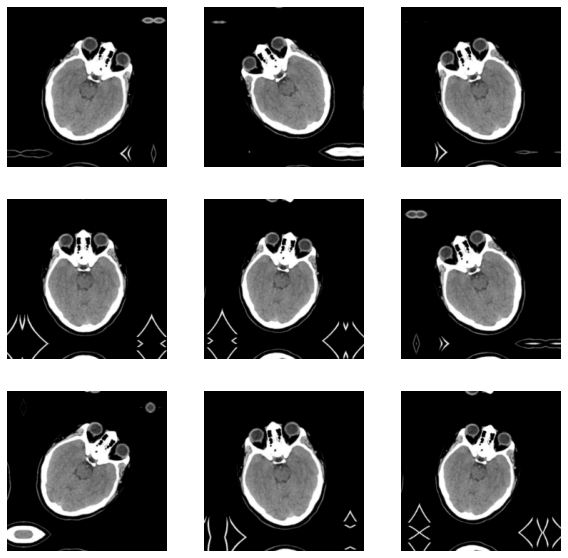

In [7]:
plt.figure(figsize=(10, 10))
for images, _ in train_df.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [8]:
train_df = train_df.prefetch(buffer_size=32)
val_df = val_df.prefetch(buffer_size=32)

In [9]:
# Hyperparameters
IMG_IND=224
IMG_SHAPE = (IMG_IND,IMG_IND,3)
LOSS = BinaryCrossentropy()
OPTIMIZER =Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999)
#OPTIMIZER =RMSprop(learning_rate=0.001)
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='BinaryAccuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

IMG_SIZE = (224, 224)
SEED = 2
BATCH_SIZE = 32


In [10]:
from keras import layers
from keras import models

#Created sequential models using Keras
base_model = models.Sequential()
base_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Flatten())
base_model.add(layers.Dense(512, activation='relu'))
base_model.add(layers.Dense(1, activation='sigmoid'))
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)      

In [11]:
def get_callbacks(model_name):
    callbacks =[]
    tensor_board = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0)
    callbacks.append(tensor_board)
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=f'model.{model_name}.h5', verbose=1, monitor='val_loss',mode='min',save_best_only=True)
    callbacks.append(checkpoint)
    anne = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=2, min_lr=1e-4,min_delta=0.00001,mode='auto') 
    callbacks.append(anne)
    return callbacks

In [12]:

base_model.trainable = True
x = base_model.output
#x = GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
#output = keras.layers.Dense(1)(x)

#adding regularization 



for layer in base_model.layers:
    layer.kernel_regularizer = tf.keras.regularizers.l1_l2(0.01)
#    for attr in ['kernel_regularizer']:
#        if hasattr(layer, attr):
#          setattr(layer, attr, regularizer)


    
predictions = Dense(1, activation='sigmoid',name='Final')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(loss ='binary_crossentropy',optimizer=OPTIMIZER,metrics=METRICS)

In [13]:
callbacks = get_callbacks('cnn_model')
history = model.fit( train_df,epochs=20,
                    validation_data= val_df,
                    callbacks=[callbacks])

Epoch 1/20
57/57 [==============================] - 15s 105ms/step - loss: 0.7169 - tp: 478.7931 - fp: 269.3621 - tn: 76.6034 - fn: 117.8966 - BinaryAccuracy: 0.5974 - precision: 0.6469 - recall: 0.8064 - auc: 0.5210 - val_loss: 0.7202 - val_tp: 277.0000 - val_fp: 173.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_BinaryAccuracy: 0.6156 - val_precision: 0.6156 - val_recall: 1.0000 - val_auc: 0.5000

Epoch 00001: val_loss improved from inf to 0.72015, saving model to model.cnn_model.h5
Epoch 2/20
57/57 [==============================] - 6s 89ms/step - loss: 0.7492 - tp: 466.1207 - fp: 287.1897 - tn: 56.6207 - fn: 132.7241 - BinaryAccuracy: 0.5532 - precision: 0.6205 - recall: 0.7733 - auc: 0.4692 - val_loss: 0.7187 - val_tp: 277.0000 - val_fp: 173.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_BinaryAccuracy: 0.6156 - val_precision: 0.6156 - val_recall: 1.0000 - val_auc: 0.5000

Epoch 00002: val_loss improved from 0.72015 to 0.71872, saving model to model.cnn_model.h5
Epoch 

In [14]:
results = model.evaluate(test_df, steps=len(test_df), verbose=1)


8/8 [==============================] - 1s 44ms/step - loss: 0.8135 - tp: 125.0000 - fp: 125.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - BinaryAccuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - auc: 0.5000


In [15]:
print('CNN model- ADAM:')
print('---------------')
print("Binary Accuracy: ",(results[5]))
print("Precision: ",(results[6]))
print("Recall: ",(results[7]))
print("AUC: ",(results[8]))
print("F1 Score: ",(2*((results[6]*results[7])/((results[6]+results[7])))))

CNN model- ADAM:
---------------
Binary Accuracy:  0.5
Precision:  0.5
Recall:  1.0
AUC:  0.5
F1 Score:  0.6666666666666666
